In [3]:
import pandas as pd 
import numpy as np

df = pd.read_csv("./datasets/penguins.csv")
#  Read, preprocess and print main statistic about the dataset as described above
# print(df.info())

# print(df)
#  Convert features with string datatype to categorical (species,island,sex).
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')
# print(df.dtypes)

# Normalize non-categorical features (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g):
# – Find the min and max values for each column
# – Rescale dataset columns to the range from 0 to 1
# print(df.columns)
columns_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Apply min-max normalization
for column in columns_to_normalize:
    min_value = df[column].min()
    max_value = df[column].max()
#     print(column)
#     print(min_value)
#     print(max_value)
    df[column] = (df[column] - min_value) / (max_value - min_value)
# print(df)

# deal with the nan 

numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in numeric_cols:
    avg_neigh = (df[col].shift(-1) + df[col].shift(1)) / 2
    df[col].fillna(avg_neigh, inplace=True)

# Impute 'sex' column with the most frequent value
df['sex'].fillna(df['sex'].mode()[0], inplace=True)



target_data = (df["sex"] == "male").values.astype(np.float32)
input_data = df.drop(['sex'], axis=1)

input_data = pd.get_dummies(input_data, columns = ['species', 'island', 'year'], drop_first=True)
# print(input_data)

train_data = input_data.sample(frac=0.8, random_state=42)  
test_data = input_data.drop(train_data.index) 



# Print the shape of your X_train, y_train, X_test, y_test.
# For training data
X_train = train_data
y_train = target_data[train_data.index]

# For testing data
X_test = test_data
y_test = target_data[test_data.index]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (275, 10)
y_train shape: (275,)
X_test shape: (69, 10)
y_test shape: (69,)


In [5]:
import numpy as np
import math

class LogitRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = 0
        self.bias = 0
        self.losses = []
        
    def fit(self, X, y):
        # Initialize weights
        X = np.array(X)
#         print(X)
        self.weights = np.random.uniform(0, 1, X.shape[1])
#         self.weights =  np.random.uniform(0, 1)
#         print(self.weights)
   
        for _ in range(self.num_iterations): 
#             print(type(X))
#             print(type(self.weights))
            y_pred = self.sigmoid(np.dot(X, self.weights))
            self.weights = self.weights - self.gradient_descent(y, y_pred, X)
            
            loss = self.cost(y, y_pred)
#             print(loss)
            self.losses.append(loss)
    
            
    def sigmoid(self, z):
        # print(z)
        return 1 / (1 + np.exp(-z))

    def cost(self, y_true, y_pred):
        
        return (-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)).mean()
    
    def gradient_descent(self, y, y_pred, X):
        return self.learning_rate * np.dot(X.T, y_pred - y) / len(y)

        
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights))
        return [1 if i > 0.5 else 0 for i in y_pred]
    
    def accuracy(self, X_test, y_test):
        y = self.predict(X_test)
        preds = np.sum(y == y_test)
        return preds / len(y_test)


# model = LogitRegression()
# model.fit(X_train, y_train)

In [6]:
model = LogitRegression(learning_rate=1e-6, num_iterations=10000)
model.fit(X_train, y_train)

In [7]:
model.accuracy(X_test, y_test)

0.4927536231884058

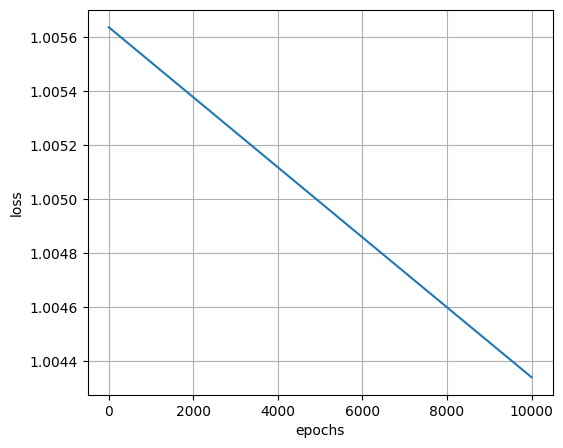

In [8]:
import matplotlib.pyplot as plt
# print(model.loss)
fig = plt.figure(1, figsize=(6, 5))
plt.plot(model.losses)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("loss_1.png", dpi=300, format='png')

In [29]:
model = LogitRegression(learning_rate=0.01, num_iterations=100000)
model.fit(X_train, y_train)

In [30]:
model.accuracy(X_test, y_test)

0.7971014492753623

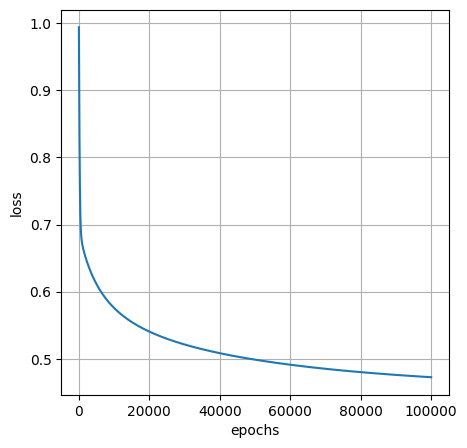

In [31]:
fig = plt.figure(1, figsize=(5, 5))
plt.plot(model.losses)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("loss_2.png", dpi=300, format='png')

In [32]:
model = LogitRegression(learning_rate=0.005, num_iterations=1000000)
model.fit(X_train, y_train)

In [33]:
model.accuracy(X_test, y_test)

0.8115942028985508

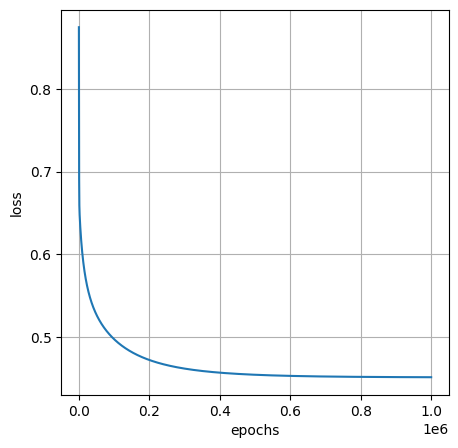

In [35]:
fig = plt.figure(1, figsize=(5, 5))
plt.plot(model.losses)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("loss_3.png", dpi=300, format='png')